<a href="https://colab.research.google.com/github/hammaad2002/RHM_FYP/blob/main/EMD_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

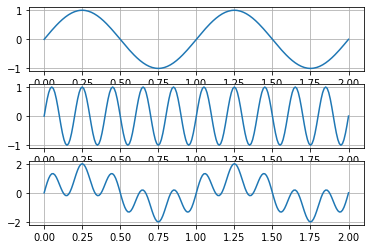

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

start = 0
end = 2
step = 0.01
amp1 = 1
amp2 = 1
frequency1 = 1
frequency2 = 5
time = np.arange(start, end+step, step)
sine1 = amp1*np.sin(2 * np.pi * frequency1 * time)
sine2 = amp2*np.sin(2 * np.pi * frequency2 * time)
plt.subplot(311)
plt.plot(time,sine1)
plt.grid()
plt.subplot(312)
plt.plot(time,sine2)
plt.grid()
plt.subplot(313)
plt.plot(time,np.add(sine1,sine2))
plt.grid()
plt.show()

**These sine waves are basically our IMFs in this case** 

In [ ]:
mean1 = np.mean(sine1) #IMF 1
print(mean1, "which is almost equal to zero")
mean2 = np.mean(sine2) #IMF 2
print(mean2, "which is almost equal to zero")
newSig = np.add(sine1,sine2)
print("Property 1 of IMF is proved over here.")

-1.6570492904853082e-18 which is almost equal to zero
-6.186317351145151e-17 which is almost equal to zero
Property 1 of IMF is proved over here.


In [ ]:
from scipy.integrate import simpson
area = simpson(sine1)
print("area =", area)

area = -1.2952601953960158e-16


In [ ]:
from scipy.integrate import simpson
area = simpson(sine2, dx=0.01)
print("area =", area)

area = -1.6505315632760662e-16


**Calculating local minimas and maximas of the signal**

In [ ]:
temp1 = sine1.tolist()
temp2 = sine2.tolist()
def extremaCalculator(x : list):
  temp1 = x
  temp = []
  for i in range(len(temp1)-2):
    if temp1[i+1]>temp1[i] and temp1[i+2]<temp1[i+1]:
      temp.append(i+1)
    elif temp1[i+1]<temp1[i] and temp1[i+2]>temp1[i+1]:
      temp.append(i+1)
    else:
      pass
  return temp
points1 = extremaCalculator(temp1)
points2 = extremaCalculator(temp2)
print([temp1[points1[i]] for i in range(len(points1))])
print([temp2[points2[i]] for i in range(len(points2))])

[1.0, -1.0, 1.0, -1.0]
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0]


**Storing Maximas and Minimas of the signal in separate variables**

In [ ]:
positivePointsOfSine1 = sine1[points1][np.where(0 < sine1[points1])]
negativePointsOfSine1 = sine1[points1][np.where(0 > sine1[points1])]

In [ ]:
positivePointsOfSine2 = sine2[points2][np.where(0 < sine2[points2])]
negativePointsOfSine2 = sine2[points2][np.where(0 > sine2[points2])]

**Confirming the fact that the sine waves can act as our IMFs since they fulfill both the properties of IMF**

In [ ]:
print("Number of local maximas and local minimas of sine 1 are equal") if len(positivePointsOfSine1) == len(negativePointsOfSine1) else print("Not equal")

Number of local maximas and local minimas of sine 1 are equal


In [ ]:
print("Number of local maximas and local minimas of sine 2 are equal") if len(positivePointsOfSine2) == len(negativePointsOfSine2) else print("Not equal")

Number of local maximas and local minimas of sine 2 are equal


**Plotting the extremas of the signal**

<function matplotlib.pyplot.show(close=None, block=None)>

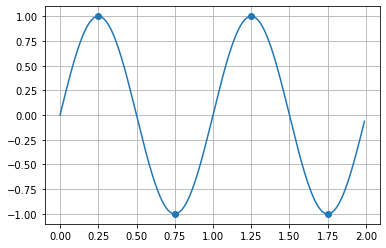

In [ ]:
plt.plot(time,sine1)
point, stemline, baseline = plt.stem(time[points1],sine1[points1])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

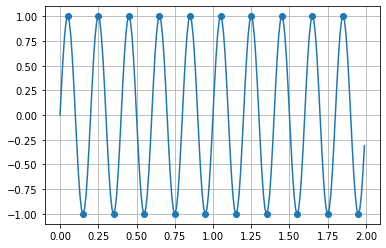

In [ ]:
plt.plot(time,sine2)
point, stemline, baseline = plt.stem(time[points2],sine2[points2])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

In [ ]:
combineSignal = np.add(sine1, sine2)
points3 = extremaCalculator(combineSignal.tolist())

**STEP 1: Find Extremas of the Signal**

<function matplotlib.pyplot.show(close=None, block=None)>

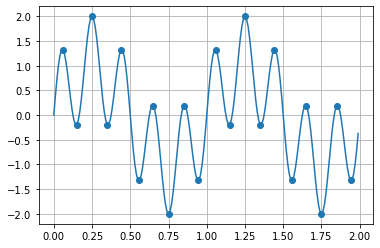

In [ ]:
plt.plot(time, combineSignal)
point, stemline, baseline = plt.stem(time[points3], combineSignal[points3])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

In [ ]:
localMaxima = combineSignal[points3][np.where(0 < combineSignal[points3])]
localMinima = combineSignal[points3][np.where(0 > combineSignal[points3])]

In [ ]:
timeMaxima = time[points3][np.where(0 < combineSignal[points3])]
timeMinima = time[points3][np.where(0 > combineSignal[points3])]

In [ ]:
from scipy.interpolate import CubicSpline
def interpolator(x: np.ndarray, y: np.ndarray, values: np.ndarray):
  cs = CubicSpline(x, y)
  return cs(values)
UpperEnv = interpolator(timeMaxima, localMaxima, time)
LowerEnv = interpolator(timeMinima, localMinima, time)

**STEP 2: Calculate Envelope of the Extremas**

<function matplotlib.pyplot.show(close=None, block=None)>

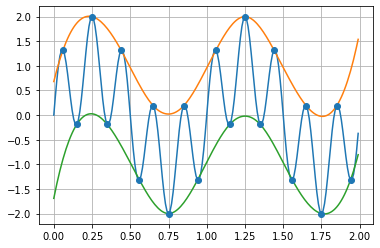

In [ ]:
plt.plot(time, combineSignal)
plt.plot(time, UpperEnv)
plt.plot(time, LowerEnv)
point, stemline, baseline = plt.stem(time[points3], combineSignal[points3])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

In [ ]:
meanEnv = np.mean(np.vstack([UpperEnv, LowerEnv]), axis=0).tolist()

**STEP 3: Calculate mean of the envelopes**

<function matplotlib.pyplot.show(close=None, block=None)>

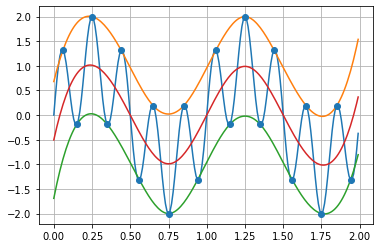

In [ ]:
plt.plot(time, combineSignal)
plt.plot(time, UpperEnv)
plt.plot(time, LowerEnv)
plt.plot(time, meanEnv)
point, stemline, baseline = plt.stem(time[points3], combineSignal[points3])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

In [ ]:
IMF1 = np.subtract(combineSignal, meanEnv)

**STEP 4: Subtract the calulcated mean from the original Signal**

<function matplotlib.pyplot.show(close=None, block=None)>

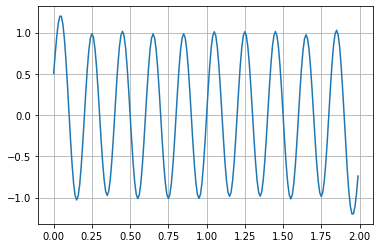

In [ ]:
plt.plot(time, IMF1)
plt.grid()
plt.show

**Check whether this extracted IMF fulfill the properties of the ideal IMFs**

In [ ]:
points4 = extremaCalculator(IMF1.tolist())

In [ ]:
positivePointsOfComb = IMF1[points4][np.where(0 < IMF1[points4])]
negativePointsOfComb = IMF1[points4][np.where(0 > IMF1[points4])]

<function matplotlib.pyplot.show(close=None, block=None)>

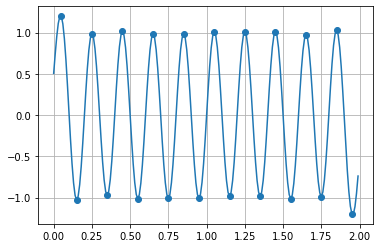

In [ ]:
plt.plot(time, IMF1)
point, stemline, baseline = plt.stem(time[points4], IMF1[points4])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

**IMF 1 is calculated till here.**

In [ ]:
print("Number of local maximas and local minimas of combined signal are equal") if len(positivePointsOfComb) == len(negativePointsOfComb) else print("Not equal")

Number of local maximas and local minimas of combined signal are equal


In [ ]:
print(np.mean(IMF1),"almost equal to zero.")

0.0025252957328199834 almost equal to zero.


**Calculating residual signal**

In [ ]:
residual = np.subtract(combineSignal, IMF1)

In [ ]:
points4 = extremaCalculator(residual.tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

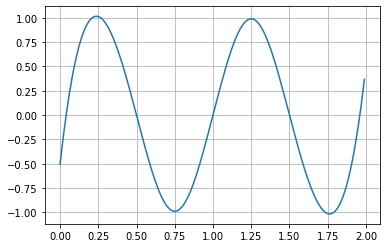

In [ ]:
plt.plot(time, residual)
plt.grid()
plt.show

**Calculating Extremas of this residual signal**

In [ ]:
positivePointsOfComb = residual[points4][np.where(0 < residual[points4])]
negativePointsOfComb = residual[points4][np.where(0 > residual[points4])]

In [ ]:
localMaximaOfIMF = residual[points4][np.where(0 < residual[points4])]
localMinimaOfIMF = residual[points4][np.where(0 > residual[points4])]

<function matplotlib.pyplot.show(close=None, block=None)>

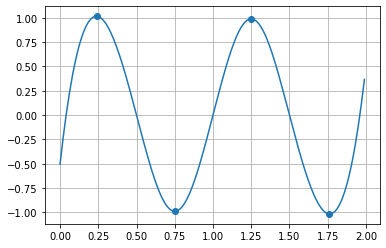

In [ ]:
plt.plot(time, residual)
point, stemline, baseline = plt.stem(time[points4], residual[points4])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

In [ ]:
timeMaximaOfIMF = time[points4][np.where(0 < residual[points4])]
timeMinimaOfIMF = time[points4][np.where(0 > residual[points4])]

In [ ]:
UpperEnvOfIMF = interpolator(timeMaximaOfIMF, localMaximaOfIMF, time)
LowerEnvOfIMF = interpolator(timeMinimaOfIMF, localMinimaOfIMF, time)

**Calculating Envelope of the residual signal**

<function matplotlib.pyplot.show(close=None, block=None)>

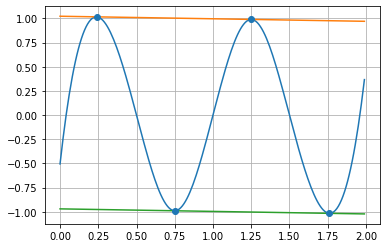

In [ ]:
plt.plot(time, residual)
plt.plot(time, UpperEnvOfIMF)
plt.plot(time, LowerEnvOfIMF)
point, stemline, baseline = plt.stem(time[points4], residual[points4])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

**Calculating mean of the envelopes**

In [ ]:
meanEnvOfIMF = np.mean(np.vstack([UpperEnvOfIMF, LowerEnvOfIMF]), axis=0).tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

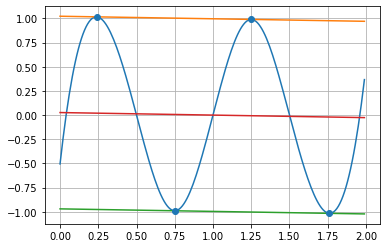

In [ ]:
plt.plot(time, residual)
plt.plot(time, UpperEnvOfIMF)
plt.plot(time, LowerEnvOfIMF)
plt.plot(time, meanEnvOfIMF)
point, stemline, baseline = plt.stem(time[points4], residual[points4])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

**Subtracting the mean from the residual signal to extract second IMF**

In [ ]:
IMF2 = np.subtract(residual, meanEnvOfIMF)

<function matplotlib.pyplot.show(close=None, block=None)>

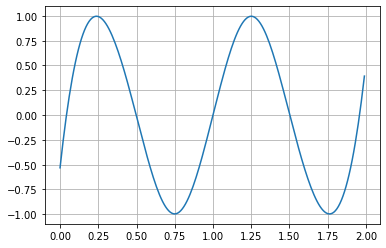

In [ ]:
plt.plot(time, IMF2)
plt.grid()
plt.show

In [ ]:
points5 = extremaCalculator(IMF2.tolist())

In [ ]:
positivePointsOfIMF2 = IMF2[points5][np.where(0 < IMF2[points5])]
negativePointsOfIMF2 = IMF2[points5][np.where(0 > IMF2[points5])]

<function matplotlib.pyplot.show(close=None, block=None)>

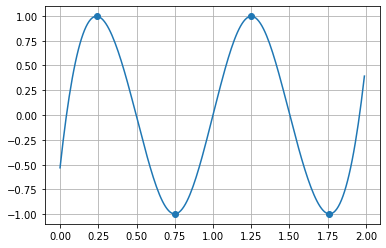

In [ ]:
plt.plot(time, IMF2)
point, stemline, baseline = plt.stem(time[points5], IMF2[points5])
stemline.remove()
baseline.remove()
plt.grid()
plt.show

**Again checking whether this IMF also fulfills the properties of the ideal IMFs**

In [ ]:
print("Number of local maximas and local minimas of combined signal are equal") if len(positivePointsOfIMF2) == len(negativePointsOfIMF2) else print("Not equal")

Number of local maximas and local minimas of combined signal are equal


In [ ]:
print(np.mean(IMF2),"almost equal to zero.")

-0.0026564796042441506 almost equal to zero.


**Repeating the process again of calculating residual signal**

In [ ]:
residual = np.subtract(residual, IMF2)

**Stopping over here because the property of residual signal is fulfilled over here i.e. the remaining signal is monotonically increasing or decreasing with no ocillations whatsoever.**

<function matplotlib.pyplot.show(close=None, block=None)>

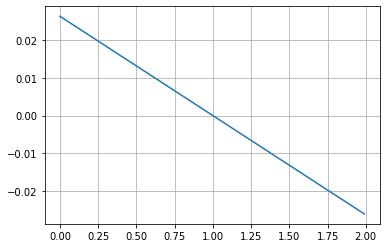

In [ ]:
plt.plot(time, residual)
plt.grid()
plt.show